In [2]:
!unzip -d /content /content/drive/MyDrive/datachar .zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
 extracting: /content/datachar/V/img032-00085.png  
 extracting: /content/datachar/V/img032-00086.png  
 extracting: /content/datachar/V/img032-00087.png  
 extracting: /content/datachar/V/img032-00088.png  
 extracting: /content/datachar/V/img032-00089.png  
 extracting: /content/datachar/V/img032-00090.png  
 extracting: /content/datachar/V/img032-00091.png  
 extracting: /content/datachar/V/img032-00092.png  
 extracting: /content/datachar/V/img032-00093.png  
 extracting: /content/datachar/V/img032-00094.png  
 extracting: /content/datachar/V/img032-00095.png  
 extracting: /content/datachar/V/img032-00096.png  
 extracting: /content/datachar/V/img032-00097.png  
 extracting: /content/datachar/V/img032-00098.png  
 extracting: /content/datachar/V/img032-00099.png  
 extracting: /content/datachar/V/img032-00100.png  
 extracting: /content/datachar/V/img032-00101.png  
 extracting: /content/datachar/V/img03

In [9]:
from keras.models import Sequential, Model
from keras.layers.normalization import BatchNormalization
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.layers import Conv2D, MaxPooling2D
from keras import layers

def model(num_classes, input_shape):
    model = Sequential()

    # 1st Convolutional Layer
    model.add(Conv2D(filters=96, input_shape=input_shape, kernel_size=(11,11), strides=(4,4), padding='valid'))
    model.add(Activation('relu'))
    # Max Pooling
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))

    # 2nd Convolutional Layer
    model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    # Max Pooling
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))

    # 3rd Convolutional Layer
    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))

    # 4th Convolutional Layer
    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))

    # 5th Convolutional Layer
    model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    # Max Pooling
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))

    # Passing it to a Fully Connected layer
    model.add(Flatten())
    # 1st Fully Connected Layer
    model.add(Dense(4096))
    model.add(Activation('relu'))
    # Add Dropout to prevent overfitting
    model.add(Dropout(0.5))

    # 2nd Fully Connected Layer
    model.add(Dense(4096))
    model.add(Activation('relu'))
    # Add Dropout to prevent overfitting
    model.add(Dropout(0.5))

    # Output Layer
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))

    return model

In [5]:
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
import os
# Define constants
DATASET_PATH = '/content/datachar'
MODEL_PATH = '.'
BATCH_SIZE = 128
EPOCHS = 20
TARGET_WIDTH = 128
TARGET_HEIGHT = 128
TARGET_DEPTH = 3

In [6]:
print("[INFO] Setting up Data Generator...")
data_gen = ImageDataGenerator(validation_split=0.2, rescale=1./255)
train_generator = data_gen.flow_from_directory(
    DATASET_PATH, 
    subset='training',
    target_size = (TARGET_WIDTH, TARGET_HEIGHT),
    batch_size = BATCH_SIZE
)
val_generator = data_gen.flow_from_directory(
    DATASET_PATH,
    subset='validation',
    target_size = (TARGET_WIDTH, TARGET_HEIGHT),
    batch_size = BATCH_SIZE
)

[INFO] Setting up Data Generator...
Found 29268 images belonging to 36 classes.
Found 7308 images belonging to 36 classes.


In [10]:
# Build model
print("[INFO] Compiling model...")
alexnet = model(train_generator.num_classes, (TARGET_WIDTH, TARGET_HEIGHT, TARGET_DEPTH))
# Compile the model
alexnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

[INFO] Compiling model...


In [11]:
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=2, min_lr=0.001)

In [12]:
# Train the network
print("[INFO] Training network ...")
H = alexnet.fit_generator(
    train_generator,
    validation_data=val_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_steps = val_generator.samples // BATCH_SIZE,
    epochs=EPOCHS, verbose=1, callbacks=[reduce_lr])

# save the model to disk
print("[INFO] Serializing network...")
alexnet.save(MODEL_PATH + os.path.sep + "trained_model")

print("[INFO] Done!")

[INFO] Training network ...


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
228/228 [==============================] - 1169s 5s/step - loss: 2.6408 - accuracy: 0.2578 - val_loss: 0.3223 - val_accuracy: 0.9098
Epoch 2/20
228/228 [==============================] - 1166s 5s/step - loss: 0.3624 - accuracy: 0.9017 - val_loss: 0.1442 - val_accuracy: 0.9572
Epoch 3/20
228/228 [==============================] - 1168s 5s/step - loss: 0.2100 - accuracy: 0.9386 - val_loss: 0.1523 - val_accuracy: 0.9587
Epoch 4/20
228/228 [==============================] - 1159s 5s/step - loss: 0.1644 - accuracy: 0.9492 - val_loss: 0.1645 - val_accuracy: 0.9582
Epoch 5/20
228/228 [==============================] - 1159s 5s/step - loss: 0.1308 - accuracy: 0.9593 - val_loss: 0.2002 - val_accuracy: 0.9498
Epoch 6/20
228/228 [==============================] - 1175s 5s/step - loss: 0.1289 - accuracy: 0.9619 - val_loss: 0.1790 - val_accuracy: 0.9548
Epoch 7/20
228/228 [==============================] - 1157s 5s/step - loss: 0.0965 - accuracy: 0.9693 - val_loss: 0.1911 - val_accuracy:

In [14]:
! cp -r /content/trained_model/ /content/drive/MyDrive/ocr

[INFO] Loading my model...
[INFO] Classifying image...


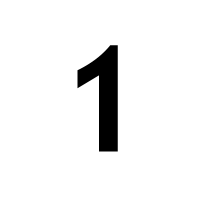

The number is : 1


In [32]:
 # prediction 
import argparse
import numpy as np
from keras.models import load_model
from keras.preprocessing.image import img_to_array
import cv2
from google.colab.patches import cv2_imshow

# Construct the argument parse and parse the arguments
labels = [
    '0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G',
    'H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z'
    ]
# Define constants
TARGET_WIDTH = 128
TARGET_HEIGHT = 128
MODEL_PATH = './trained_model'
# Load the image
image = './1.png'
original_image = cv2.imread(image)
# Preprocessing the image
image = cv2.resize(original_image, (TARGET_WIDTH, TARGET_HEIGHT))
image = image.astype("float") / 255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
# Load the trained convolutional neural network
print("[INFO] Loading my model...")
model = load_model(MODEL_PATH, compile=False)
# Classify the input image then find the index of the class with the *largest* probability
print("[INFO] Classifying image...")
prob = model.predict(image)[0]

# Display original image
cv2_imshow(original_image)

print('The number is :',np.argmax(np.array(prob)))